In [2]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

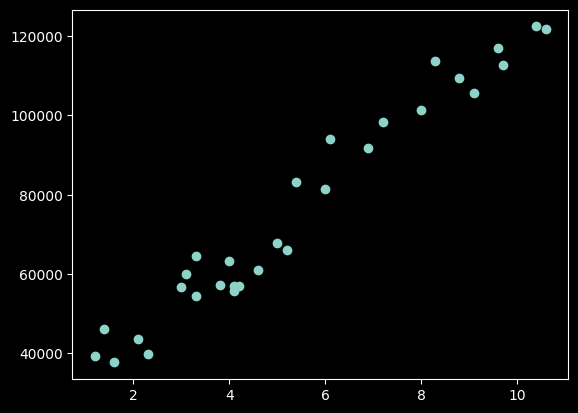

In [3]:
# Loading and visualizing the dataset, with experience and salary being the two fields
data = pd.read_csv('Salary_dataset.csv')
plt.scatter(data.Experience,data.Salary)
plt.show()

In [4]:
'''
Instead of running loops to find the optimal parameters θ_0 and θ_1.
Normal Equation helps to directly find the θ Matrix by simple Matrix Multiplication
Using the Steps:
    1. X Transpose * X
    2. Inversing The product
    3. Multiplying this result by X Transpose
    4. Mutliplying again by Y matrix
    i.e., θ = (X.T @ X)**(-1) @ X.T @ y

'''

def NormalEquation():
    x = np.array(data.Experience)
    ones = np.ones(x.shape[0])
    x = np.column_stack((x, ones))
    y = np.array(data.Salary)
    xT = x.transpose()
    x_inv = np.linalg.inv(np.dot(xT, x))
    theta = np.dot(np.dot(x_inv, xT), y)  # Normal Equation
    return theta

In [5]:
'''
To Actually perform linear regression using batch gradient regression,
    1. fix a learning rate (usually eithe 0.0001, 0.001 or 0.01)
    trial and error has allowed me to set it at 0.0001,
    2. Using loops and required variables we try to perform:
        θ_j := θ_j - α* Σ(i=1 to n)(y(i) - h(x(i)))*x(i)_j
        here, j = 0,1 i = 1-> length of data (number of rows)
    and our hypothesis function h(x) = (θ_0) + (θ_1*x)
'''

def BatchGradientDescent(theta0, theta1):
    learning_rate = 0.0001
    m = len(data)
    dtheta0 = 0
    dtheta1 = 0
    for i in range(m):
        x_i = data.Experience[i]
        y_i = data.Salary[i]
        hypothesis = theta0 + theta1 * x_i
        error = hypothesis - y_i
        dtheta0 += error
        dtheta1 += error * x_i
    theta0 = theta0 - learning_rate * (1/m) * dtheta0
    theta1 = theta1 - learning_rate * (1/m) * dtheta1
    return theta0, theta1

In [6]:
'''
Running for a high number of iterations gets us closer to accurate thetas
'''
theta0 = 0
theta1 = 0
iterations = 500000
for i in range(iterations):
    theta0,theta1 = BatchGradientDescent(theta0,theta1)
    if(i % 500 == 0):
        print("Theta values after", i, "iterations of Gradient Descent: theta0 =", theta0, ", theta1 =", theta1)

Theta values after 0 iterations of Gradient Descent: theta0 = 7.6004 , theta1 = 48.50044133333334
Theta values after 500 iterations of Gradient Descent: theta0 = 1835.9086405733954 , theta1 = 10871.631739530294
Theta values after 1000 iterations of Gradient Descent: theta0 = 2307.1508885403778 , theta1 = 12465.076751588815
Theta values after 1500 iterations of Gradient Descent: theta0 = 2572.953639079245 , theta1 = 12675.290121533297
Theta values after 2000 iterations of Gradient Descent: theta0 = 2805.9659974378433 , theta1 = 12678.450252885405
Theta values after 2500 iterations of Gradient Descent: theta0 = 3032.088412410282 , theta1 = 12650.862976768305
Theta values after 3000 iterations of Gradient Descent: theta0 = 3255.2235404170833 , theta1 = 12618.953526891128
Theta values after 3500 iterations of Gradient Descent: theta0 = 3475.976368401464 , theta1 = 12586.680106257863
Theta values after 4000 iterations of Gradient Descent: theta0 = 3694.4573593002187 , theta1 = 12554.6331460

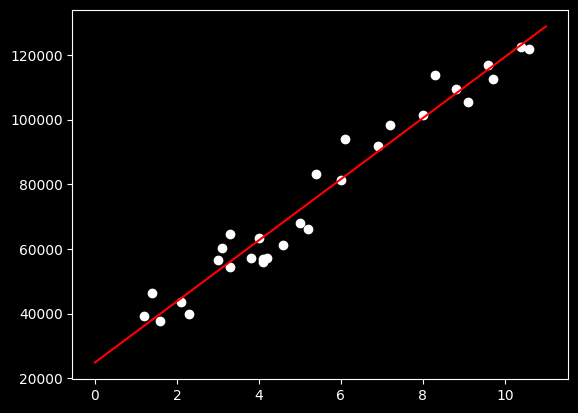

In [7]:
'''Plotting the graph of data and that of our hypothesis gives us a picture of the accuracy of alogirhtm with respect to our data'''

plt.scatter(data.Experience,data.Salary,color = 'white')
plt.plot(list(range(0,12)), [theta0 + theta1*x for x in range(0,12)], color = 'red')
plt.show()

In [8]:
print("Comparing the results of Gradient Descent with Normal Equation") 
print("Gradient Descent Thetas: ", np.array((np.array(theta1),np.array(theta0))))
print("Normal Equation Thetas:", NormalEquation())
print("Absolute Error in thetas is:")
print("Theta0 Error:", abs(NormalEquation()[0] - theta1))
print("Theta1 Error:", abs(NormalEquation()[1] - theta0))
print("Relative Error in thetas is")
print("Theta0 Relative Error:", abs(NormalEquation()[0] - theta1)/abs(NormalEquation()[0])*100,"%")
print("Theta1 Relative Error:", abs(NormalEquation()[1] - theta0)/abs(NormalEquation()[1])*100,"%")

Comparing the results of Gradient Descent with Normal Equation
Gradient Descent Thetas:  [ 9450.07854303 24847.41208896]
Normal Equation Thetas: [ 9449.96232146 24848.20396652]
Absolute Error in thetas is:
Theta0 Error: 0.11622157697274815
Theta1 Error: 0.7918775597136118
Relative Error in thetas is
Theta0 Relative Error: 0.0012298628610283462 %
Theta1 Relative Error: 0.00318686034926497 %


We get

Absolute errors in thetas:
θ_0 relative error = 0.116221%
θ_1 relative error = 0.791877%

Relative errors in thetas:
θ_0 relative error = 0.001229%
θ_1 relative error = 0.003186%


In [9]:
# Making predictions
# Lets take an example that is already there in our training example to check the accuracy of the predictions.
print("Predicted salary for 8 years of experience:", theta0 + theta1*1.2)
print("Actual Salary for 1.2 years of Experience: ", data.Salary[0])
print("Percentage of difference in the Actual and Predicted Salaries is: ", ((data.Salary[0] - (theta0 + theta1*1.2))/data.Salary[0])*100,"%")

# Now we can predict salary for lets say experience of 8 years with accuracy
print("Predicted salary for 8 years of experience:",theta0 + theta1*8)

Predicted salary for 8 years of experience: 36187.5063406019
Actual Salary for 1.2 years of Experience:  39344
Percentage of difference in the Actual and Predicted Salaries is:  8.02280820302485 %
Predicted salary for 8 years of experience: 100448.04043321984


It has been observed that Batch Gradient Descent is not very efficient for applications with large amount of data since for each iteration it would require the algorithm to read through all data again and again. Instead Stochastic/Incremental Gradient Descent is used
